In [ ]:
import pandas as pd
from openai import OpenAI
import os
from tqdm.auto import tqdm
from tqdm import tqdm

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

tqdm.pandas(desc="Processing statements")

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.9/221.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
os.environ["OPENAI_API_KEY"] = '###############################'

# Initialize the OpenAI client using the environment variable
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

In [ ]:
dat = pd.read_csv("/content/politifact_triples .csv")

In [ ]:
def statement_predict(text_triples, statement_triples):
    completion = client.chat.completions.create(
        model="gpt-4-1106-preview",
        messages=[
            {"role": "user",
             "content": f"Determine from the context triplets below if the statement triplets are true or false. \
                          Context: {text_triples} \
                          Statement: {statement_triples}\
                          In the output, please directly provide the output without any beginning sentence. Reply ONLY with 'True' or 'False'. If some triplets are determined as true and some are determined as false, only reply with the most possible answer."
                         }
        ])
    # Return the model's response
    return completion.choices[0].message.content


In [ ]:
dat['statement'][0]

'John McCain opposed bankruptcy protections for families "who were only in bankruptcy because of medical expenses they couldn\'t pay."'

In [ ]:
try1 = statement_predict(dat['text_triples'][1], dat["statement_triples"][1])
try1

'False'

In [ ]:
len(dat)

1186

In [ ]:
prediction = []

for i in tqdm(range(len(dat))):  # Iterate over the first 5 rows

    predict = statement_predict(dat['text_triples'][i], dat["statement_triples"][i])
    prediction.append(predict)

100%|██████████| 1186/1186 [10:59<00:00,  1.80it/s]


In [ ]:
prediction = ["TRUE" if p == "TRUE" else "FALSE" if p == "FALSE" else "True" if p == "True."else "False" if p == "Mostly False" else p for p in prediction]



In [ ]:
prediction

['True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'Fa

In [ ]:
dat["prediction"] = prediction
#dat.to_csv("politifact_predition.csv")

In [ ]:
# Assuming dat is a dictionary with keys "verdict" and "prediction"
dat["verdict"] = [str(v) for v in dat["verdict"]]
dat["prediction"] = [str(p) for p in dat["prediction"]]

# Now you can compute the confusion matrix without the type mismatch error
matrix_confusion = confusion_matrix(dat["verdict"], dat["prediction"])
matrix_confusion

array([[561,  72],
       [ 72, 481]])

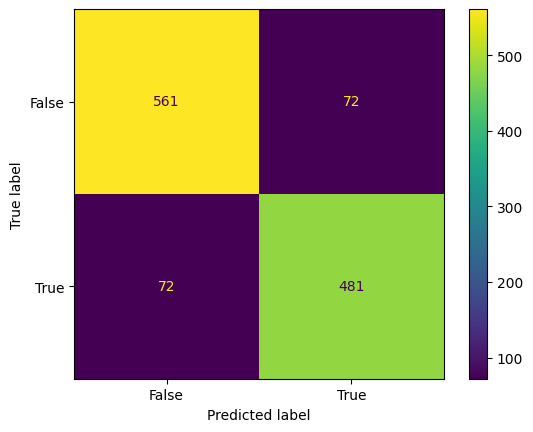

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming matrix_confusion is your confusion matrix computed earlier
# If you know the labels, you can specify them, otherwise, they will be inferred
labels = ['False', 'True']  # Replace with your actual class labels if known

ConfusionMatrixDisplay(matrix_confusion, display_labels=labels).plot()


In [ ]:
accuracy = accuracy_score(dat['verdict'], dat['prediction'])
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [ ]:
precision = precision_score(dat['verdict'], dat['prediction'], pos_label='True')
print(f'Precision: {precision:.2f}')

Precision: 0.87


In [ ]:
recall = recall_score(dat['verdict'], dat['prediction'], pos_label='True')
print(f'Recall: {recall:.2f}')

Recall: 0.87


In [ ]:
f1 = f1_score(dat['verdict'], dat['prediction'], pos_label='True')
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.87


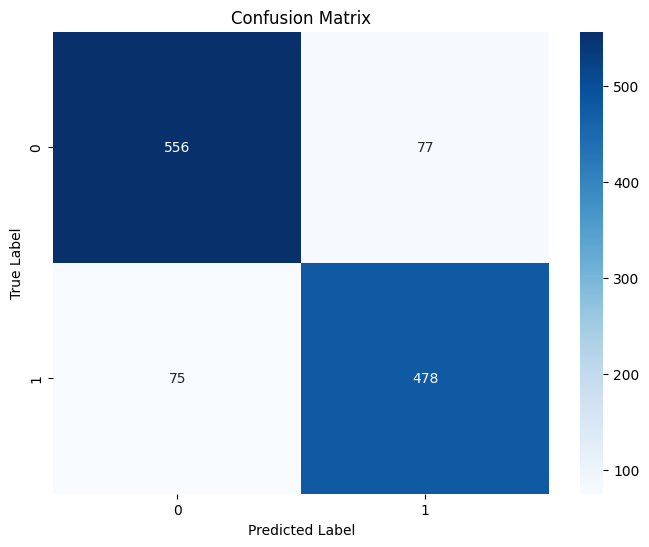

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(matrix_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()